Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

CONEXIÓN CON MYSQL WORKBENCH

NIVEL 1 - EXERCICI 1

In [98]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def crea_conexion_mysql():
    try:
        connection = mysql.connector.connect(host='localhost',
                                            database='script4_transactions',
                                            user='root',
                                            password='Calabozo1605*')
        return connection
    except mysql.connector.Error as e:
        print("Error reading data from MySQL table", e)
        return None
    
def obtener_tablas(connection):
#Obtiene la lista de tablas de la base de datos.
    sql_select_Query = "show tables"
    cursor = connection.cursor(dictionary=True, buffered=True)
    cursor.execute(sql_select_Query)
       
    # Se almacenan los valores en una lista
    tabla_nombre_tablas = []
    for fila in cursor.fetchall():
        tabla_nombre_tablas.append(fila['Tables_in_script4_transactions'])
    cursor.close()
    print(tabla_nombre_tablas)
    return tabla_nombre_tablas

def cargar_datos_en_diccionario(connection, tabla_nombre_tablas):
    data_dict_bd = {}

    for tabla in tabla_nombre_tablas:
        sql_select_Query1 = f"select * from {tabla}"
        df = pd.read_sql(sql_select_Query1,connection)
        data_dict_bd[tabla] = df

    return data_dict_bd

# ------------- PROGRAMA PRINCIPAL ------------------

conexion = crea_conexion_mysql()
if conexion:
    tablas = obtener_tablas(conexion)                           # Se obtiene los nombfres de las tablas a ser caragadas
    data_dict = cargar_datos_en_diccionario(conexion, tablas)   # Se cargan los datos en cada tabla

print(data_dict)

# Se hgace una copia de los dataframe para trabajarlos posteriormente.
datosdf_companies = pd.DataFrame(data_dict["companies"])
datosdf_transactions = pd.DataFrame(data_dict["transactions"])
datosdf_detalle_transacciones = pd.DataFrame(data_dict["detalle_transacciones"])
datosdf_products = pd.DataFrame(data_dict["products"]) 
datosdf_users = pd.DataFrame(data_dict["users"]) 
datosdf_credit_cards = pd.DataFrame(data_dict["credit_cards"])
datosdf_cestado_tarjetas = pd.DataFrame(data_dict["estado_tarjetas"])

# ------------- FIN PROGRAMA PRINCIPAL ------------------

['companies', 'credit_cards', 'detalle_transacciones', 'estado_tarjetas', 'numbersequence', 'products', 'tabla_cantidad', 'transactions', 'users']


C:\Users\User\AppData\Local\Temp\ipykernel_3636\812741441.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_select_Query1,connection)
C:\Users\User\AppData\Local\Temp\ipykernel_3636\812741441.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_select_Query1,connection)


{'companies':    company_id                 company_name           phone  \
0      b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1      b-2226     Magna A Neque Industries  04 14 44 64 62   
2      b-2230                  Fusce Corp.  08 14 97 58 85   
3      b-2234    Convallis In Incorporated  06 66 57 29 50   
4      b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   
..        ...                          ...             ...   
95     b-2602                 Placerat LLP  05 43 67 24 41   
96     b-2606                Sed Est Corp.  04 58 02 37 91   
97     b-2610     Egestas Nunc Sed Limited  06 01 02 70 47   
98     b-2614              Rutrum Non Inc.  02 66 31 61 09   
99     b-2618                Non Institute  06 77 15 31 14   

                               email         country  \
0   donec.porttitor.tellus@yahoo.net         Germany   
1        risus.donec.nibh@icloud.org       Australia   
2               risus@protonmail.edu   United States   
3                

VISUALIZAR UNA VARIABLE NUMERICA

count    100.000000
mean     102.007200
std       59.795203
min        2.120000
25%       53.235000
50%       96.580000
75%      158.995000
max      196.650000
Name: price, dtype: float64


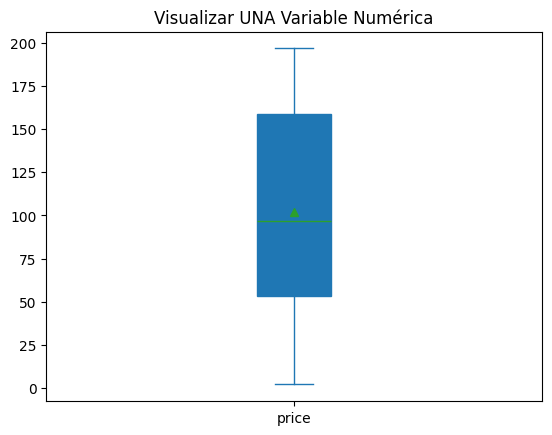

In [99]:
#============== EJERCICIO 1 ====================  
datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')
nuevos_datos = datosdf_products["price"] 
nuevos_datos.plot.box(patch_artist = True, showmeans = True, showfliers = True)
#nuevos_datos.plot.hist(bins= 20)  Se puede representar también con un histograma
plt.title("Visualizar UNA Variable Numérica")
print(datosdf_products["price"].describe())

DOS VARFIABLES NUMÉRICAS

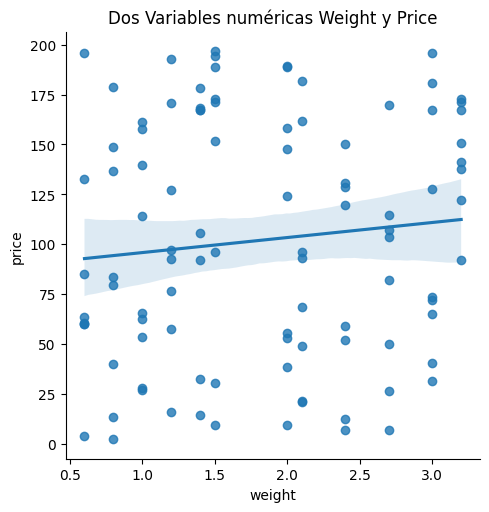

In [100]:
#============== EJERCICIO 2  - Dos Numéricas ==================== 
import seaborn as sns

datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')

nuevos_datos = datosdf_products["price"] 

sns.lmplot(
    data=datosdf_products,
    x="weight", y="price"
)
plt.title("Dos Variables numéricas Weight y Price")
plt.show()


Text(0, 0.5, 'Cantidad de Empresas')

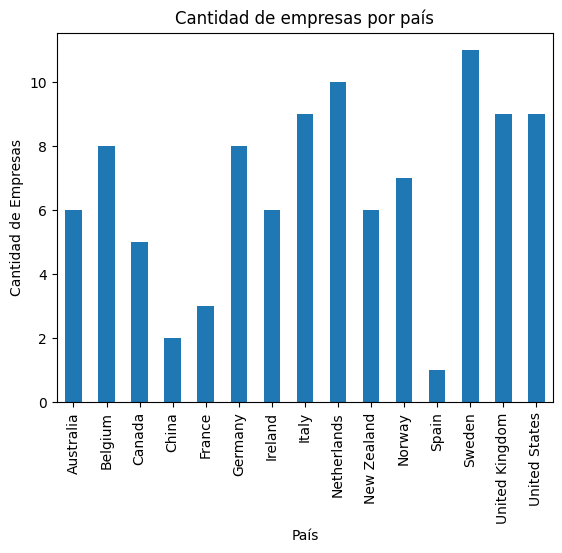

In [101]:
#Visualizar dos variables
datosdf = pd.DataFrame(data_dict["companies"])  
#datosdf.groupby(["country"])["company_id"].count().plot.pie() 
datosdf.groupby(["country"])["company_id"].count().plot.bar()
plt.title("Cantidad de empresas por país")
plt.xlabel("País")
plt.ylabel("Cantidad de Empresas")

VISUALIZAR UNA VARIABLE CATEGÓRICA

Text(0, 0.5, 'Cantidad')

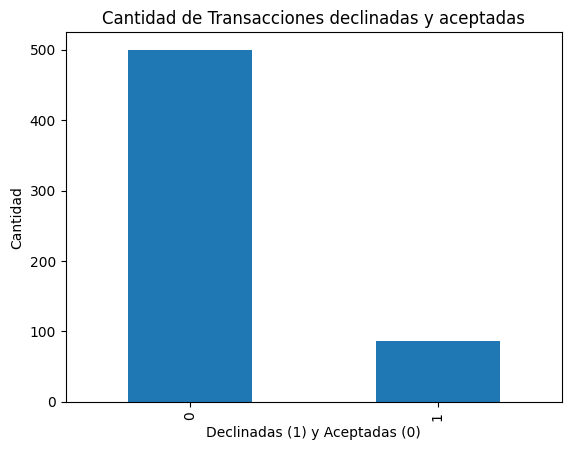

In [102]:
#============== EJERCICIO 3 ====================  
#Visualización de UNA variable categórica
datosdf = pd.DataFrame(data_dict["transactions"])   
datosdf["declined"].value_counts().plot.bar()
plt.title("Cantidad de Transacciones declinadas y aceptadas")
plt.xlabel("Declinadas (1) y Aceptadas (0)")
plt.ylabel("Cantidad")

VISUALIZAR UNA VARIABLE CATEGÓRICA Y UNA NUNERICA

Text(0.5, 1.0, 'Monto de transacciones declinadas vs aceptadas')

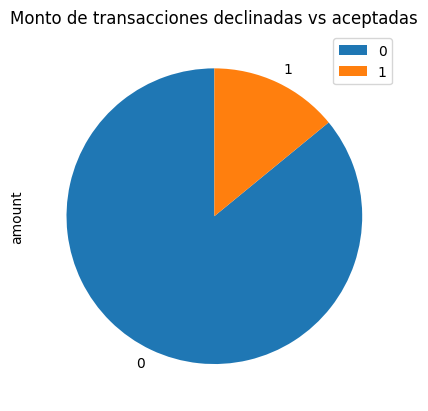

In [ ]:
#============== EJERCICIO 4 - ====================  
#Visualizar dos variables
datosdf = pd.DataFrame(data_dict["transactions"])   
datosdf.groupby(["declined"])[["amount"]].sum().plot.pie(subplots=True, startangle = 90)
plt.title("Monto de transacciones declinadas vs aceptadas")

VISUALIZAR DOS VARIABLES CATEGÓRICAS



<Axes: xlabel='country'>

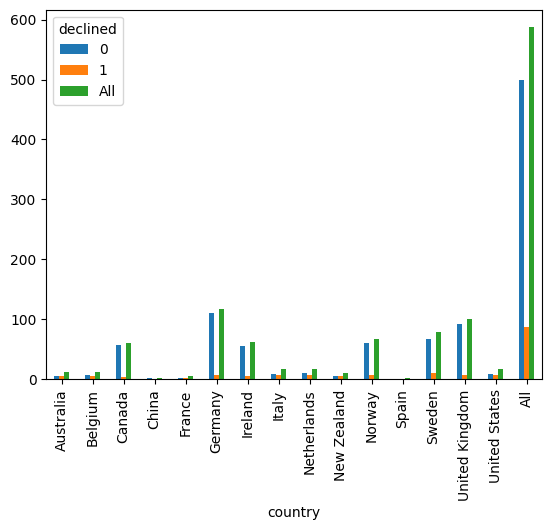

In [97]:
#============== EJERCICIO 5  - Dos Categóricas ==================== 

df1 = data_dict["companies"]
df2 = data_dict["transactions"]

datosdf = pd.merge(df1, df2, left_on='company_id', right_on='business_id', how='left')
df = pd.crosstab(datosdf["country"], datosdf["declined"], margins=True)
df.plot.bar()


  TRES VARIABLES

En el gráfico resultante aparece una recta de regresión por cada grupo de Productos. Esto se debe al uso del parámetro hue=product_name.

Las otras visualizaciones se estudia el JOIN y el MERGE. El método join() es similar a la función merge() en términos de parámetros y operaciones. Pero la mayor diferencia entre ambos es que join combina DataFrames basados ​​en índices, mientras que merge combina con índices o columnas . De manera predeterminada, el método join() realiza una unión izquierda, mientras que merge realiza una unión interna.


Text(0.5, 1.0, 'Tres numéricas Weight-Price-Product_name')

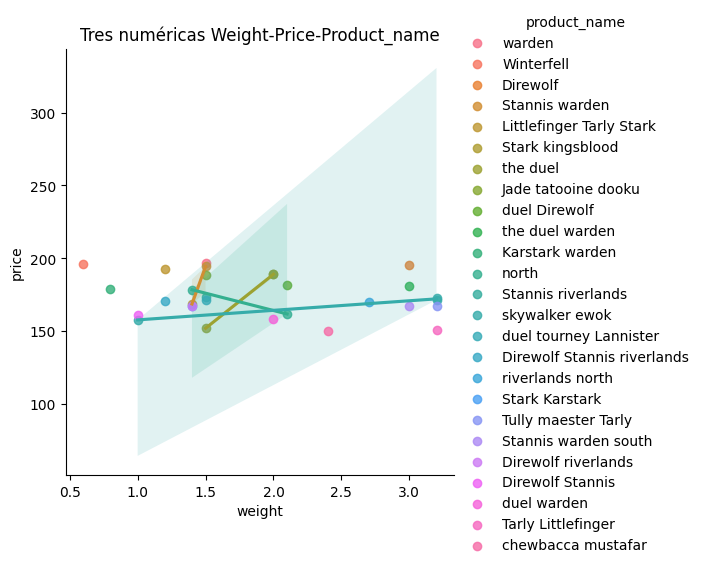

In [106]:
#============== EJERCICIO 6  - Tres Variables - Product_name - Price - Weight ==================== 

import seaborn as sns

datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')

nuevos_datos = datosdf_products

df_mayores = nuevos_datos.nlargest(30,"price")

sns.lmplot(
    data=df_mayores,
    x="weight", y="price", hue="product_name"
)
plt.title("Tres numéricas Weight-Price-Product_name")

GRAFICAR UN PAIRPLOT

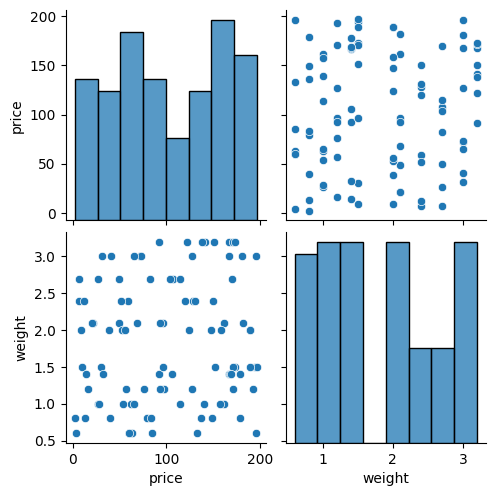

In [96]:
#============== EJERCICIO 7 ==================== 

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data_dict["products"])
df["price"] = df["price"].str.replace("$", "", regex=False).astype('float64')
# Crear el Pairplot
sns.pairplot(df)

# Mostrar la gráfica
plt.show()